In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = (784 X 100) Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 = (100X10)  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
    
   
    # 정확도 측정함수
    def accuracy(self, test_data):
        
        matched_list = []
        not_matched_list = []
        
        for index in range(len(test_data)):
                        
            label = int(test_data[index, 0])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (test_data[index, 1:] / 255.0 * 0.99) + 0.01
            
                  
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            predicted_num = self.predict(np.array(data, ndmin=2)) 
        
            if label == predicted_num:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
        print("Current Accuracy = ", 100*(len(matched_list)/(len(test_data))), " %")
        
        return matched_list, not_matched_list
    
    
    def train(self, input_data, target_data):   # input_data : 784 개, target_data : 10개
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
                        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)
    
        return predicted_num

In [3]:
import numpy as np

# 0~9 숫자 이미지가 784개의 숫자 (28x28)로 구성되어 있는 training data 읽어옴
training_data = np.loadtxt('./mnist_train.csv', delimiter=',', dtype=np.float32, skiprows=1)

# 0~9 숫자 이미지가 784개의 숫자 (28x28)로 구성되어 있는 test data 읽어옴
test_data = np.loadtxt('./mnist_test.csv', delimiter=',', dtype=np.float32, skiprows=1)


In [4]:
print("training_data.shape = ", training_data.shape, " ,  test_data.shape = ", test_data.shape)

training_data.shape =  (60000, 785)  ,  test_data.shape =  (10000, 785)


In [5]:
print("training_data[0,0] = ", training_data[0,0], ",  test_data[0,0] = ", test_data[0,0])

print("len(training_data[0]) = ", len(training_data[0]), ",  len(test_data[0]) = ", len(test_data[0]))

training_data[0,0] =  5.0 ,  test_data[0,0] =  7.0
len(training_data[0]) =  785 ,  len(test_data[0]) =  785


In [6]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3
epochs = 1

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

start_time = datetime.now()

loss_val_list = []

for i in range(epochs):
    
    for step in range(len(training_data)):  # train
    
        # input_data, target_data normalize        
        target_data = np.zeros(output_nodes) + 0.01    
        target_data[int(training_data[step, 0])] = 0.99
    
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
        nn.train( np.array(input_data, ndmin=2), np.array(target_data, ndmin=2) )
    
        if step % 400 == 0:
            loss_val = nn.loss_val()
            loss_val_list.append(loss_val)
            print("step = ", step,  ",  loss_val = ", loss_val)
        
end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time) 

step =  0 ,  loss_val =  4.034150984687698
step =  400 ,  loss_val =  1.4626570935523815
step =  800 ,  loss_val =  1.2639820510849473
step =  1200 ,  loss_val =  0.6916627063132721
step =  1600 ,  loss_val =  0.97742957253135
step =  2000 ,  loss_val =  1.4735680836052831
step =  2400 ,  loss_val =  0.7055808954187852
step =  2800 ,  loss_val =  0.8346962177181411
step =  3200 ,  loss_val =  0.7489272183499082
step =  3600 ,  loss_val =  0.6927712579092598
step =  4000 ,  loss_val =  0.9146129058743817
step =  4400 ,  loss_val =  0.7723817803621199
step =  4800 ,  loss_val =  1.4881364132739148
step =  5200 ,  loss_val =  0.8145032666280437
step =  5600 ,  loss_val =  0.9262231945045125
step =  6000 ,  loss_val =  0.8468863679726388
step =  6400 ,  loss_val =  0.9160404101288859
step =  6800 ,  loss_val =  0.9179779207058013
step =  7200 ,  loss_val =  0.8386738460115526
step =  7600 ,  loss_val =  0.895359152554949
step =  8000 ,  loss_val =  0.9333745573926961
step =  8400 ,  loss_v

In [7]:
nn.accuracy(test_data)    # epochs == 1 인 경우

Current Accuracy =  94.07  %


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  120,
  121,
  122,
  123,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  145,
  146,
  147,
  148,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,

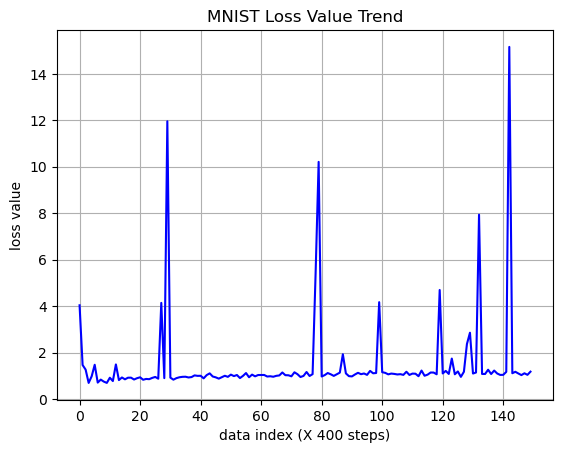

In [8]:
# 손실함수 추세 확인
import matplotlib.pyplot as plt

x_data_list = [index for index in range(len(loss_val_list))]
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 1):  # 수집한 모든 손실 값을 사용
    Y_DATA_LIST.append(loss_val_list[index])

plt.title('MNIST Loss Value Trend')
plt.xlabel('data index (X 400 steps)')
plt.ylabel('loss value')
plt.grid()
plt.plot(x_data_list, Y_DATA_LIST, color='b')
plt.show()
